In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv('Clean_Data.csv')
df

,Unnamed: 0,Impressions,Clicks,Spent,success,y,z,M,7,10,...,Amount_Purchased_1-5,Amount_Purchased_5-10,Amount_Purchased_10-20,Amount_Purchased_20-50,Amount_Purchased_50-100,Amount_Clicked_1-5,Amount_Clicked_5-10,Amount_Clicked_10-20,Amount_Clicked_20-50,Amount_Clicked_50-100
0,0,7350,1,1.430000,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,17861,2,1.820000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,693,0,0.000000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4259,1,1.250000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,4133,1,1.290000,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
5,5,1915,0,0.000000,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
6,6,15615,3,4.770000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
7,7,10951,1,1.270000,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
8,8,2355,1,1.500000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
9,9,9502,3,3.160000,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


# XGBoost

In [25]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score

In [26]:
X = df.drop(['success','Unnamed: 0'], axis = 1) 

# Create target variable
y = df['success'] 

# Create a list of the features being used 
feature_cols = X.columns
feature_cols

Index(['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5',
       'Amount_Purchased_5-10', 'Amount_Purchased_10-20',
       'Amount_Purchased_20-50', 'Amount_Purchased_50-100',
       'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20',
       'Amount_Clicked_20-50', 'Amount_Clicked_50-100'],
      dtype='object')

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=35)

xg_clf = xgb.XGBClassifier(objective ='binary:logistic')

xg_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [28]:
preds = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.994987
F1: 0.995098


In [29]:
# using k-fold validation for XGBoost

data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results 

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.440734,0.000033,0.440829,0.000728
1,0.300314,0.000035,0.300440,0.000930
2,0.211744,0.000425,0.212662,0.002982
3,0.152306,0.000418,0.153203,0.002495
4,0.111496,0.000663,0.112664,0.002569
5,0.082399,0.000507,0.084014,0.002825
6,0.061675,0.000383,0.063415,0.002839
7,0.046660,0.000292,0.048681,0.003571
8,0.035695,0.000282,0.037696,0.003446
9,0.027557,0.000270,0.029456,0.003405


In [30]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)


In [31]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg

In [32]:
train = pd.concat([X_train, y_train], axis=1)
target = 'success'
IDcol = 'index'
train.head()

,Impressions,Clicks,Spent,y,z,M,7,10,15,16,...,Amount_Purchased_5-10,Amount_Purchased_10-20,Amount_Purchased_20-50,Amount_Purchased_50-100,Amount_Clicked_1-5,Amount_Clicked_5-10,Amount_Clicked_10-20,Amount_Clicked_20-50,Amount_Clicked_50-100,success
379,5839,1,1.370000,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
751,128595,23,36.480001,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
417,104578,29,39.250001,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
175,25884,5,7.350000,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
55,13329,4,5.630000,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [33]:
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.9973
AUC Score (Train): 0.999985


In [34]:
alg.feature_importances_

array([1.9373329e-02, 1.1042521e-03, 1.1377401e-02, 0.0000000e+00,
       0.0000000e+00, 7.7416850e-03, 0.0000000e+00, 2.3807378e-03,
       8.5109554e-04, 4.4847075e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.7448142e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.8413198e-03, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 6.8196654e-03, 0.0000000e+00, 6.6365959e-04,
       8.2232660e-01, 7.1154945e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 1.8881815e-02, 1.6177883e-02, 6.2593617e-03,
       3.8166957e-03, 0.0000000e+00], dtype=float32)

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=140,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [38]:
gsearch1.best_score_

1.0

In [39]:
preds = gsearch1.best_estimator_.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.994987
F1: 0.995098


In [40]:
from xgboost import plot_importance
alg.get_booster().get_fscore()

{'Amount_Purchased_1-5': 19,
 'Amount_Purchased_5-10': 15,
 'Impressions': 16,
 'Amount_Clicked_1-5': 9,
 '29': 2,
 'Clicks': 6,
 'Spent': 7,
 'Amount_Clicked_5-10': 2,
 '21': 1,
 '35-39': 1,
 '45-49': 1,
 '16': 1,
 'M': 3,
 'Amount_Clicked_20-50': 1,
 'Amount_Clicked_10-20': 1,
 '10': 1,
 '15': 1}

In [41]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]= "True"

NameError: name 'plot' is not defined

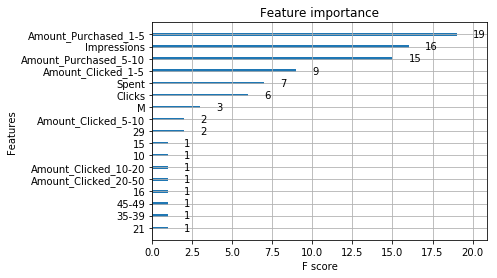

In [44]:
# plot feature importance
from xgboost import plot_importance
plot_importance(alg)
pyplot.show()